In [2]:
import numpy as np 
import seaborn as sns
import pandas as pd
import altair as alt

## Regression
## Models GPR, LASSO, RF
## Zhu, Lunghini, and ChemBL Data
## Circular Fingerprint, Mordred Descriptors, RDKit Descriptors, MACCS Keys Fingerprints

In [3]:
grid_results = pd.read_csv('regression_grid_results.csv')
grid_results

,Unnamed: 0,datafile,model,featurizer,r2_score,mean_squared_error
0,0,lunghini_fish_LC50,RFR,MordredDescriptors,0.621150,2.746160
1,1,lunghini_fish_LC50,RFR,CircularFingerprint,0.457292,3.875465
2,2,lunghini_fish_LC50,RFR,RDKitDescriptors,0.609864,2.813539
3,3,lunghini_fish_LC50,RFR,MACCSKeysFingerprint,0.511136,3.525265
4,4,lunghini_fish_LC50,GPR,MordredDescriptors,-0.001085,7.251436
5,5,lunghini_fish_LC50,GPR,CircularFingerprint,0.074436,6.703365
6,6,lunghini_fish_LC50,GPR,RDKitDescriptors,-0.001328,7.250698
7,7,lunghini_fish_LC50,GPR,MACCSKeysFingerprint,0.232329,5.552000
8,8,lunghini_fish_LC50,LASSO,MordredDescriptors,0.478091,3.772205
9,9,lunghini_fish_LC50,LASSO,CircularFingerprint,-0.000989,7.253992


In [4]:
graph_results = pd.read_csv('regression_graph_results.csv')
graph_results

,Unnamed: 0,datafile,model,featurizer,r2_score,mean_squared_error
0,0,lunghini_fish_LC50,GraphCNN,ConvMolFeaturizer,0.519521,3.475162
1,1,lunghini_daphnia_EC50,GraphCNN,ConvMolFeaturizer,0.496229,3.846698
2,2,lunghini_algea_EC50,GraphCNN,ConvMolFeaturizer,0.381757,3.378627
3,3,zhu_rat_LD50,GraphCNN,ConvMolFeaturizer,0.490201,0.466994
4,4,chembl_ecoli_MIC,GraphCNN,ConvMolFeaturizer,0.716889,1.575918


In [5]:
all_results = grid_results.append(graph_results)

In [9]:
# R2 Score 
source = all_results

selection = alt.selection_multi(fields=['datafile'], bind='legend')

alt.Chart(source).mark_bar().encode(
    alt.X('featurizer:N'),
    alt.Y('r2_score:Q', stack=None), 
    alt.Color('datafile:N'),
    alt.Column('model:N'),
    opacity=alt.condition(selection, alt.value(1), alt.value(0.1))
).add_selection(
    selection
)

alt.Chart(...)

In [37]:
# R2 Score 
source = all_results

selection = alt.selection_multi(fields=['datafile'], bind='legend')

alt.Chart(source).mark_bar().encode(
    alt.X('featurizer:N'),
    alt.Y('mean_squared_error:Q', stack=None), 
    alt.Color('datafile:N'),
    alt.Column('model:N'),
    opacity=alt.condition(selection, alt.value(1), alt.value(0.1))
).add_selection(
    selection
)

alt.Chart(...)

## Regression
## Graph CNN with ConvMol Featurizer 

[Text(0, 0, 'lunghini_fish_LC50'),
 Text(1, 0, 'lunghini_daphnia_EC50'),
 Text(2, 0, 'lunghini_algea_EC50'),
 Text(3, 0, 'zhu_rat_LD50'),
 Text(4, 0, 'chembl_ecoli_MIC')]

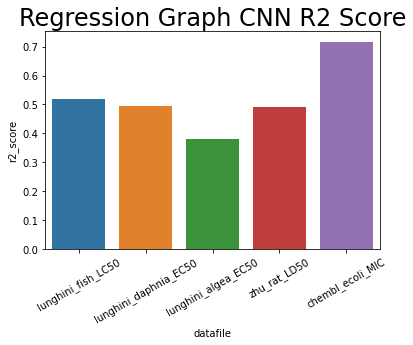

In [28]:
ax = sns.barplot(x='datafile', y='r2_score', data=graph_results)
ax.set_title(("Regression Graph CNN R2 Score"),fontsize=24)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)

[Text(0, 0, 'lunghini_fish_LC50'),
 Text(1, 0, 'lunghini_daphnia_EC50'),
 Text(2, 0, 'lunghini_algea_EC50'),
 Text(3, 0, 'zhu_rat_LD50'),
 Text(4, 0, 'chembl_ecoli_MIC')]

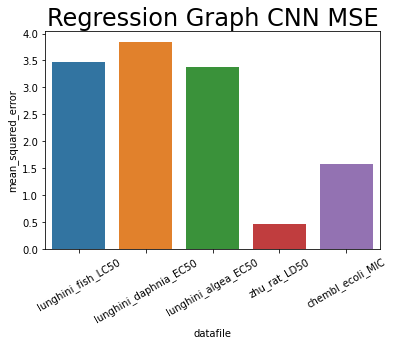

In [33]:
ax = sns.barplot(x='datafile', y='mean_squared_error', data=graph_results)
ax.set_title(("Regression Graph CNN MSE"),fontsize=24)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)

## Classification Grid

In [32]:
class_grid_results = pd.read_csv('classification_grid_results.csv')
class_grid_results

,Unnamed: 0,datafile,model,featurizer,recall_score,jaccard_score
0,0,lunghini_fish_LC50,RFC,MordredDescriptors,0.810018,0.666322
1,1,lunghini_fish_LC50,RFC,CircularFingerprint,0.743976,0.600374
2,2,lunghini_fish_LC50,RFC,RDKitDescriptors,0.806399,0.676535
3,3,lunghini_fish_LC50,RFC,MACCSKeysFingerprint,0.759778,0.610703
4,4,lunghini_fish_LC50,GPC,MordredDescriptors,0.000000,0.000000
5,5,lunghini_fish_LC50,GPC,CircularFingerprint,0.576223,0.469007
6,6,lunghini_fish_LC50,GPC,RDKitDescriptors,0.008070,0.008061
7,7,lunghini_fish_LC50,GPC,MACCSKeysFingerprint,0.727927,0.587554
8,8,lunghini_fish_LC50,KNNC,MordredDescriptors,0.704881,0.537687
9,9,lunghini_fish_LC50,KNNC,CircularFingerprint,0.595826,0.479207


In [33]:
class_graph_results = pd.read_csv('classification_graph_results.csv')
class_graph_results

,Unnamed: 0,datafile,model,featurizer,recall_score,jaccard_score
0,0,lunghini_fish_LC50,GraphCNN,ConvMolFeaturizer,0.752278,0.624300
1,1,lunghini_daphnia_EC50,GraphCNN,ConvMolFeaturizer,0.729115,0.590488
2,2,lunghini_algea_EC50,GraphCNN,ConvMolFeaturizer,0.743911,0.580582
3,3,zhu_rat_LD50,GraphCNN,ConvMolFeaturizer,0.747048,0.602879
4,4,chembl_ecoli_MIC,GraphCNN,ConvMolFeaturizer,0.911708,0.807840


In [34]:
all_graph_results = class_grid_results.append(class_graph_results)

In [38]:
# Recall Score
source = all_graph_results

selection = alt.selection_multi(fields=['datafile'], bind='legend')

alt.Chart(source).mark_bar().encode(
    alt.X('featurizer:N'),
    alt.Y('recall_score:Q', stack=None), 
    alt.Color('datafile:N'),
    alt.Column('model:N'),
    opacity=alt.condition(selection, alt.value(1), alt.value(0.1))
).add_selection(
    selection
)

alt.Chart(...)

In [39]:
# Jaccard Score
source = all_graph_results

selection = alt.selection_multi(fields=['datafile'], bind='legend')

alt.Chart(source).mark_bar().encode(
    alt.X('featurizer:N'),
    alt.Y('jaccard_score:Q', stack=None), 
    alt.Color('datafile:N'),
    alt.Column('model:N'),
    opacity=alt.condition(selection, alt.value(1), alt.value(0.1))
).add_selection(
    selection
)

alt.Chart(...)